In [25]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
import LVQ

In [26]:
data = pd.read_csv(r"../data/SVNE_Hieu.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=20)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train[:, 0:6] = minmax.fit_transform(x_train[:, 0:6])
x_test[:, 0:6] = minmax.transform(x_test[:, 0:6])

In [27]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)

In [28]:
np.unique(y)

array([0, 1], dtype=int64)

In [29]:
labels = np.zeros((2, 10, 10))
labels

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [30]:
patterns = [[[[] for i in range(10)] for i in range(10)] for i in range(2)]

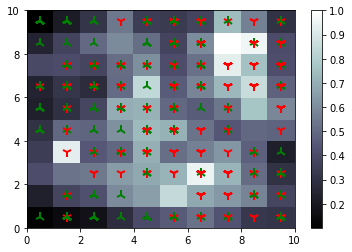

In [31]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['1', '2']
colors = ['r', 'g']
for i, x in enumerate(x_train[:, 0:6]):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
        patterns[0][w[0]][w[1]].append(x)
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
        patterns[1][w[0]][w[1]].append(x)
show()

In [32]:
labels

array([[[  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
        [  1.,   1.,   0.,   1.,   1.,   1.,   6.,   2.,   0.,   0.],
        [  0.,   0.,   2.,   1.,   0.,   0.,   3.,   7.,   0.,   0.],
        [  0.,   0.,   1.,   2.,   0.,   3.,   6.,   8.,   0.,   1.],
        [  0.,   0.,   3.,  12.,  18.,   2.,   0.,   3.,   0.,   3.],
        [  2.,   0.,   2.,   9.,  23.,   8.,   9.,   1.,   6.,  13.],
        [ 12.,   8.,  12.,  11.,   8.,   0.,   5.,   3.,   7.,   9.],
        [  2.,   5.,  12.,   1.,   1.,   2.,   5.,   9.,   0.,   1.],
        [  2.,   3.,   5.,   1.,   0.,   0.,  16.,   8.,   9.,   2.],
        [  8.,   4.,   1.,   0.,   1.,   6.,  35., 152.,  19.,   1.]],

       [[  1.,   0.,   0.,   0.,   5.,   7.,   2.,   0.,   1.,  15.],
        [ 30.,   5.,   0.,   0.,   1.,   2.,  19.,  39.,   1.,  66.],
        [ 27.,   7.,   0.,   1.,   2.,  14.,  23.,  25.,   1.,   3.],
        [  1.,   1.,   0.,   4.,   1.,   3.,   1.,   5.,   0.,   0.],
        [ 43.,   0

In [33]:
# parameter for LVQ
R = 50 # R is the # of initial prototype for each class
n_classes = 2
epsilon = 0.9
epsilon_dec_factor = 0.001

In [34]:
from random import randint
p_vectors = []
count_death = 0
for i in range(10):
    for j in range(10):
        if((labels[0, i, i] == 0 and labels[1, i, j] <= 3) or (labels[0, i, i] <= 3 and labels[1, i, j] == 0)):
#             p = LVQ.prototype(randint(0,1), som.weights[(i,j)], epsilon)
#             p_vectors.append(p)
            count_death = count_death + 1
        elif(labels[0, i, j] > 5 * labels[1, i, j] and labels[1, i, j] >= 0):
            p = LVQ.prototype(0, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(5 * labels[0, i, j] < labels[1, i, j] and labels[0, i, j] >= 0):
            p = LVQ.prototype(1, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        else:
            p = LVQ.prototype(randint(0,1), som.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

1 	 [0.29096642 0.30449678 0.39690551 0.58406491 0.55467313 0.12764077]
1 	 [0.33888904 0.29267401 0.33032356 0.59183499 0.57961574 0.06449362]
1 	 [0.32710569 0.43143424 0.47822443 0.41251581 0.5542562  0.02825839]
1 	 [0.38995033 0.38677794 0.38833922 0.46779571 0.57295794 0.02050841]
1 	 [0.39457263 0.3795292  0.37449706 0.47517077 0.57612643 0.04809427]
0 	 [0.30359083 0.34017466 0.39902191 0.56356512 0.54641292 0.12931586]
1 	 [0.28610842 0.3008308  0.38286505 0.58465428 0.57498552 0.09288802]
1 	 [0.28080793 0.30617584 0.40353297 0.57877383 0.57266504 0.04049693]
1 	 [0.29784185 0.34594438 0.44533325 0.52117075 0.56516495 0.04754626]
1 	 [0.32710117 0.40698173 0.49982698 0.42838289 0.53820402 0.06609245]
1 	 [0.33878354 0.42965815 0.51706863 0.39160652 0.52817904 0.03050985]
1 	 [0.37821389 0.41393908 0.40219495 0.4451495  0.57056795 0.01191854]
1 	 [0.38551572 0.4038507  0.38933934 0.45374249 0.57449551 0.02774478]
0 	 [0.36997981 0.29834784

In [35]:
count_death

15

In [36]:
mappings = som.win_map(x_train)

In [37]:
len(mappings[(0,1)]) - len(patterns[0][0][1]) - len(patterns[1][0][1])

0

In [38]:
patterns[1][0][1]

[]

In [39]:
a = [1, 2]
b = [233, 4]
a = a + b

In [40]:
b = np.asarray(patterns[0][0][1])

In [41]:
b = np.zeros([2])
a = np.ones([3])
np.concatenate((a, b))

array([1., 1., 1., 0., 0.])

In [42]:
for i in range(10):
    for j in range(10):
        if((labels[0, i, i] == 0 and labels[1, i, j] <= 3) or (labels[0, i, i] <= 3 and labels[1, i, j] == 0)):
            continue
        elif(labels[0, i, j] <= 5 * labels[1, i, j] and labels[1, i, j] > 2 and labels[1, i, j] < labels[0, i, j]):
            impure = np.asarray(patterns[0][i][j] + patterns[1][i][j])
            impure_labels = np.concatenate((np.zeros([len(patterns[0][i][j])]), np.ones([len(patterns[1][i][j])])))
            small_lvq = LVQ.LVQ(x=impure, y=impure_labels, n_classes=2, n_neurons=4, p_vectors=[], epsilon=0.9, epsilon_dec_factor=0.001)
            neurons = small_lvq.fit(impure, impure_labels)
            p_vectors = p_vectors + small_lvq.p_vectors
            print (i, j)
        elif(5 * labels[0, i, j] >= labels[1, i, j] and labels[0, i, j] > 2 and labels[0, i, j] < labels[1, i, j]):
            impure = np.asarray(patterns[0][i][j] + patterns[1][i][j])
            impure_labels = np.concatenate((np.zeros([len(patterns[0][i][j])]), np.ones([len(patterns[1][i][j])])))
            small_lvq = LVQ.LVQ(x=impure, y=impure_labels, n_classes=2, n_neurons=4, p_vectors=[], epsilon=0.9, epsilon_dec_factor=0.001)
            neurons = small_lvq.fit(impure, impure_labels)
            p_vectors = p_vectors + small_lvq.p_vectors
            print (i, j)

1 6
2 7
3 7
4 4
5 5
5 8
5 9
6 6
6 7
6 8
6 9


In [43]:
labels

array([[[  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
        [  1.,   1.,   0.,   1.,   1.,   1.,   6.,   2.,   0.,   0.],
        [  0.,   0.,   2.,   1.,   0.,   0.,   3.,   7.,   0.,   0.],
        [  0.,   0.,   1.,   2.,   0.,   3.,   6.,   8.,   0.,   1.],
        [  0.,   0.,   3.,  12.,  18.,   2.,   0.,   3.,   0.,   3.],
        [  2.,   0.,   2.,   9.,  23.,   8.,   9.,   1.,   6.,  13.],
        [ 12.,   8.,  12.,  11.,   8.,   0.,   5.,   3.,   7.,   9.],
        [  2.,   5.,  12.,   1.,   1.,   2.,   5.,   9.,   0.,   1.],
        [  2.,   3.,   5.,   1.,   0.,   0.,  16.,   8.,   9.,   2.],
        [  8.,   4.,   1.,   0.,   1.,   6.,  35., 152.,  19.,   1.]],

       [[  1.,   0.,   0.,   0.,   5.,   7.,   2.,   0.,   1.,  15.],
        [ 30.,   5.,   0.,   0.,   1.,   2.,  19.,  39.,   1.,  66.],
        [ 27.,   7.,   0.,   1.,   2.,  14.,  23.,  25.,   1.,   3.],
        [  1.,   1.,   0.,   4.,   1.,   3.,   1.,   5.,   0.,   0.],
        [ 43.,   0

In [44]:
len(p_vectors)

173

In [45]:
lvq = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=R, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq.fit(x_train, y_train)

In [46]:
predicted_y = [lvq.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.90      0.87      0.88        60
          1       0.89      0.92      0.91        73

avg / total       0.89      0.89      0.89       133



In [47]:
A = np.array(predicted_y)-y_test
len(A[A==0])/len(A)

0.8947368421052632